In [1]:
import pandas as pd

In [ ]:
df=pd.read_csv('final_cleaned_leads.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_name             45 non-null     object 
 1   company_domain           45 non-null     object 
 2   cleaned_url              45 non-null     object 
 3   created_at               45 non-null     object 
 4   domain_age               45 non-null     float64
 5   votes_count              45 non-null     int64  
 6   reviews_count            45 non-null     int64  
 7   email_valid              45 non-null     int64  
 8   email_guess              35 non-null     object 
 9   linkedin_enriched        45 non-null     int64  
 10  linkedin_url             44 non-null     object 
 11  linkedin_follower_count  45 non-null     float64
 12  industry                 45 non-null     object 
 13  industry_freq            45 non-null     float64
 14  employees                45 

In [ ]:
df.head()

,company_name,company_domain,cleaned_url,created_at,domain_age,votes_count,reviews_count,email_valid,email_guess,linkedin_enriched,...,linkedin_follower_count,industry,industry_freq,employees,hq_country,hq_country_freq,hq_state,hq_city,lead_score,lead_score_final
0,Startup Stash,startupstash.com,https://startupstash.com/,2015-02-25 09:28:06,10.36,9314,147,1,contact@startupstash.com,1,...,3306.0,Software Development,0.533333,6.0,IL,0.022222,Tel Aviv,Tel Aviv,0.479581,0.876926
1,Wordware,app.wordware.ai,https://app.wordware.ai/lp,2024-08-02 07:01:00,0.92,7838,0,0,NaN,1,...,8811.0,Software Development,0.533333,6.0,US,0.444444,NaN,San Francisco,0.297334,0.530656
2,Slack,slack.com,https://slack.com/intl/en-in/,2013-12-03 18:11:40,11.59,7332,336,1,contact@slack.com,1,...,1631069.0,Software Development,0.533333,3000.0,US,0.444444,California,San Francisco,0.544357,1.000000
3,Startup Pitch Decks,cirrusinsight.com,https://www.cirrusinsight.com/blog/startup-pit...,2016-09-06 07:04:41,8.83,5642,55,1,contact@cirrusinsight.com,1,...,459.0,Venture Capital and Private Equity Principals,0.022222,1.0,US,0.444444,ca,santa rosa,0.343615,0.618589
4,Pexels 2.0,pexels.com,https://www.pexels.com/,2015-05-23 14:32:59,10.12,4658,51,1,contact@pexels.com,1,...,808.0,Advertising Services,0.044444,6.0,AU,0.022222,Queensland,Fortitude Valley,0.308009,0.550938


In [ ]:
df['founded_recently'] = (df['domain_age'] < 2).astype(int)

In [ ]:
features = [
    "industry_freq", "hq_country_freq", "email_valid", "linkedin_enriched",
    "votes_count", "reviews_count", "linkedin_follower_count", "employees",
    "domain_age", "founded_recently"
]
target = "lead_score_final"


In [ ]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse}")
print(f"✅ R2 Score: {r2:.2f}")


✅ MSE: 0.003025693677013401
✅ R2 Score: 0.78


In [ ]:
model = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse:.5f}")
print(f"✅ R2 Score: {r2:.2f}")

✅ MSE: 0.00255
✅ R2 Score: 0.82


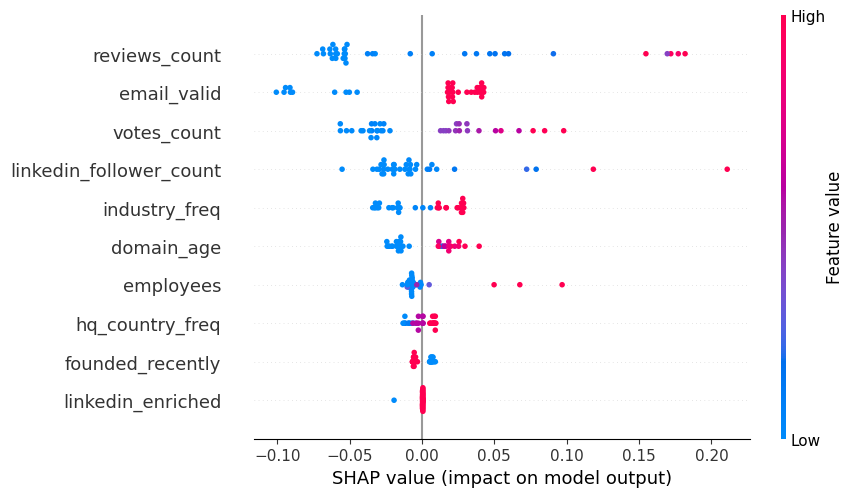

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)


In [ ]:
i = 0  # index of the row to explain
top_indices = abs(shap_values[i].values).argsort()[-5:][::-1]

top_features = [
    {
        "feature": shap_values.feature_names[j],
        "value": X_test.iloc[i, j],
        "impact": shap_values[i].values[j]
    }
    for j in top_indices
]


In [ ]:
print(top_features)

[{'feature': 'reviews_count', 'value': np.int64(0), 'impact': np.float64(0.05712025574697085)}, {'feature': 'votes_count', 'value': np.int64(166), 'impact': np.float64(0.05458369266509382)}, {'feature': 'email_valid', 'value': np.int64(1), 'impact': np.float64(0.02159011986117952)}, {'feature': 'domain_age', 'value': np.float64(0.01), 'impact': np.float64(0.01867259443659148)}, {'feature': 'industry_freq', 'value': np.float64(0.5333333333333333), 'impact': np.float64(-0.0164788233743012)}]


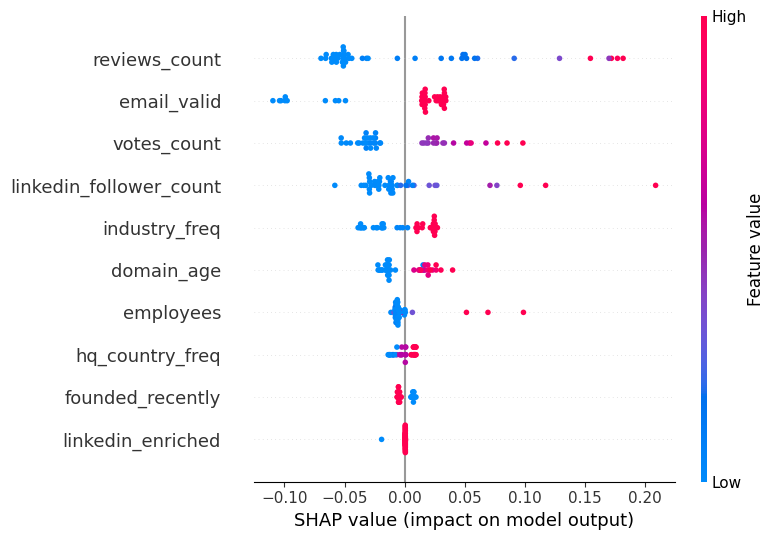

In [ ]:
import shap

# Assuming model is already trained and X is your input feature DataFrame
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Get mean absolute SHAP values across the dataset
shap.summary_plot(shap_values, X)


In [ ]:
import json

In [ ]:
#Save SHAP explanations as JSON string per row
shap_explanations = []
for i, row in enumerate(shap_values.values):
    instance_expl = []
    for feat_name, feat_value, shap_val in zip(X.columns, X.iloc[i], row):
        instance_expl.append({
            "feature": feat_name,
            "value": feat_value,
            "impact": shap_val
        })
    shap_explanations.append(json.dumps(instance_expl))
# Append explanations to DataFrame
df['shap_explanation'] = shap_explanations


In [ ]:
import shap

# Assuming `model` is trained, and `X_test` is your input
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Get explanation for a single instance
instance_idx = 0
shap_row = shap_values[instance_idx]

# Now loop over feature names and values
explanations = []
for feature_name, shap_val, input_val in zip(shap_row.feature_names, shap_row.values, shap_row.data):
    impact = shap_val
    val = input_val
    if impact > 0:
        reason = f"{feature_name.replace('_', ' ').title()} of {val} : with impact of {impact} contributed positively to the score."
    else:
        reason = f"{feature_name.replace('_', ' ').title()} of {val} :with impact of {impact} slightly reduced the score."
    explanations.append(reason)

# Print explanations or send to Gemini
for e in explanations:
    print("•", e)


• Industry Freq of 0.5333333333333333 : with impact of 0.028451280682424515 contributed positively to the score.
• Hq Country Freq of 0.4444444444444444 : with impact of 0.009460846357291707 contributed positively to the score.
• Email Valid of 1.0 : with impact of 0.0367668511708972 contributed positively to the score.
• Linkedin Enriched of 1.0 : with impact of 0.0005445524350054458 contributed positively to the score.
• Votes Count of 166.0 :with impact of -0.03498626993182875 slightly reduced the score.
• Reviews Count of 0.0 :with impact of -0.04948890550925474 slightly reduced the score.
• Linkedin Follower Count of 66941.0 : with impact of 0.027999196115969325 contributed positively to the score.
• Employees of 125.0 :with impact of -0.008601527434722003 slightly reduced the score.
• Domain Age of 0.01 :with impact of -0.015746962113755418 slightly reduced the score.
• Founded Recently of 1.0 :with impact of -0.004434182801762492 slightly reduced the score.


In [ ]:
# Mean absolute SHAP value per feature
import numpy as np
mean_importance = np.abs(shap_values.values).mean(axis=0)

for feature_name, importance in sorted(zip(shap_values.feature_names, mean_importance), key=lambda x: -x[1]):
    print(f"{feature_name}: {importance:.4f}")


reviews_count: 0.0594
email_valid: 0.0312
votes_count: 0.0308
linkedin_follower_count: 0.0259
industry_freq: 0.0225
domain_age: 0.0149
hq_country_freq: 0.0082
employees: 0.0077
founded_recently: 0.0053
linkedin_enriched: 0.0005


In [ ]:
df["lead_score_predicted"] = model.predict(X)  # Already normalized between 0 and 1


In [ ]:
df.head()

,company_name,company_domain,cleaned_url,created_at,domain_age,votes_count,reviews_count,email_valid,email_guess,linkedin_enriched,...,employees,hq_country,hq_country_freq,hq_state,hq_city,lead_score,lead_score_final,founded_recently,shap_explanation,lead_score_predicted
0,Startup Stash,startupstash.com,https://startupstash.com/,2015-02-25 09:28:06,10.36,9314,147,1,contact@startupstash.com,1,...,6.0,IL,0.022222,Tel Aviv,Tel Aviv,0.479581,0.876926,0,"[{""feature"": ""industry_freq"", ""value"": 0.53333...",0.762227
1,Wordware,app.wordware.ai,https://app.wordware.ai/lp,2024-08-02 07:01:00,0.92,7838,0,0,NaN,1,...,6.0,US,0.444444,NaN,San Francisco,0.297334,0.530656,1,"[{""feature"": ""industry_freq"", ""value"": 0.53333...",0.439725
2,Slack,slack.com,https://slack.com/intl/en-in/,2013-12-03 18:11:40,11.59,7332,336,1,contact@slack.com,1,...,3000.0,US,0.444444,California,San Francisco,0.544357,1.000000,0,"[{""feature"": ""industry_freq"", ""value"": 0.53333...",0.909984
3,Startup Pitch Decks,cirrusinsight.com,https://www.cirrusinsight.com/blog/startup-pit...,2016-09-06 07:04:41,8.83,5642,55,1,contact@cirrusinsight.com,1,...,1.0,US,0.444444,ca,santa rosa,0.343615,0.618589,0,"[{""feature"": ""industry_freq"", ""value"": 0.02222...",0.582612
4,Pexels 2.0,pexels.com,https://www.pexels.com/,2015-05-23 14:32:59,10.12,4658,51,1,contact@pexels.com,1,...,6.0,AU,0.022222,Queensland,Fortitude Valley,0.308009,0.550938,0,"[{""feature"": ""industry_freq"", ""value"": 0.04444...",0.566094


In [ ]:
df.to_csv("base_score_leads.csv", index=False)